# Project: Investigate a Dataset - No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset we are working with today contains data from April to June of 2016. Using this dataset may help discover some relationships on what factors encourage or discourage no-shows to a medical appointment.

Columns contained within the dataset are:
>0. PatientID - unique ID assigned to each patient
>1. AppointmentID - unique ID assigned to each appointment
>2. Gender - Sex of patient
>3. ScheduledDay - day appointment was originally scheduled
>4. AppointmentDay - day patient was seen
>5. Age - age of patient
>6. Neighbourhood - location of hospital
>7. Scholarship - Enrolled or Not Enrolled in Brazilian Welfare progran, Bolsa Familia
>8. Hypertension - diagnosis
>9. Diabetes - diagnosis
>10. Alcoholism - diagnosis
>11. Handicap - total number of disabilities
>12. SMS_received - received text message notification reminder
>13. No-show - No means they showed up | Yes means they did not


### Question(s) for Analysis

1. Which diagnosis had the highest percentage of attendance? lowest?
2. Was there a difference in attendance between genders?
3. Did patients that received a sms message have better attendance than those that did not?
4. Did welfare make a difference in attendance?
5. How did the percentage of attendance differ between age groups?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
 

1. Checked what data type each column was and then changed a few of the columns:
    * PatientID - changed to int for better legiblity and confirm that it only contains numerical data
    * Scholarship and SMS_received - changed to string since the 0s and 1s will be replaced with Yes and No

In [3]:
#Check data type for each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

2. Changed the data types of some of the columns:
    * PatientID for better legibility and because the PatientID is numerical data
    * Scholarship and SMS_received to string type because the numbers will be replaced

In [4]:
#change data type of patientID for better legibility
df['PatientId'] = df['PatientId'].astype(int)
df['Scholarship'] = df['Scholarship'].astype(str)
df['SMS_received'] = df['SMS_received'].astype(str)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


3. Searched for total of duplicates found to see if any needed to be removed

In [5]:
#locate duplicates - no duplicates so none were removed
sum(df.duplicated())

0

4. Converted ScheduledDay and AppointmentDay columns to date format to remove the timestamp. Only the date will be analyzed. This also will make it easier to analyze and read.

In [6]:
#convert ScheduledDay and AppointmentDay to date format and remove time
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


5. Renamed Scholarship column to Welfare for clarity while also correcting any mispellings
    * Hipertension to Hypertension
    * Neighbourhood to Neighborhood
    * Handcap to Handicap
    * PatientId to PatientID

In [7]:
#rename column "Scholarship" to Welfare for clarity and correct column spelling
df.rename(columns={'Scholarship': 'Welfare', 
                   'Hipertension': 'Hypertension', 
                   'Neighbourhood': 'Neighborhood', 
                   'Handcap': 'Handicap',
                   'PatientId' : 'PatientID'}, inplace=True)

# changing datatype of SMS_received and Welfare to string and converting 0s to No and 1s to Yes

df['Welfare'] = np.where(df['Welfare'] == '0', 'No', 'Yes')
df['SMS_received'] = np.where(df['SMS_received'] == '0', 'No', 'Yes')
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,1,0,0,0,No,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,0,0,0,0,No,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,0,0,0,0,No,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,0,0,0,0,No,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,1,1,0,0,No,No


6. Checked specific columns to confirm that the expected values were found in each column. If found, they were replaced with the correct corresponding value. 
    * Example: If it was supposed to be only Yes and No values, then if Y or N were found, then they would be replaced to follow Yes/No.

In [8]:
#check for values that don't follow column format (ex: Yes, Y, N, No
#instead of just Yes and No, or Female and F)
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [9]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [10]:
df['Welfare'].value_counts()

No     99666
Yes    10861
Name: Welfare, dtype: int64

In [11]:
df['SMS_received'].value_counts()

No     75045
Yes    35482
Name: SMS_received, dtype: int64

In [12]:
df['Hypertension'].value_counts()

0    88726
1    21801
Name: Hypertension, dtype: int64

In [13]:
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [14]:
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [15]:
df['Handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

7. Checked the Age column to confirm there were no "impossible ages" such as negative numbers or extremely large numbers that are not typically in the range of a human lifespan. If found, row would be deleted.

In [16]:
#check that for impossible ages
df.query('Age < 0')
i = 99832

In [17]:
df.query('Age > 120')

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


In [18]:
#remove incorrect data
df.drop(i, inplace = True)

In [19]:
df.query('Age < 0')

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - Which diagnosis had the highest percentage of attendance? lowest?
#### Findings:

* Highest in Attendance is Hypertension
* Lowest in attendance is Handicap
* There is not enough data on Handicap patients to confirm if their handicap is the true reason for lack of attendance or access to transportation

In [20]:
#group by diagnosis
hypertension = df.groupby(["Hypertension","No-show"], as_index=False)["PatientID"].count()
hypertension = hypertension.query('Hypertension == 1')
diabetes = df.groupby(["Diabetes","No-show"], as_index=False)["PatientID"].count()
diabetes = diabetes.query('Diabetes == 1')
alcoholism = df.groupby(["Alcoholism","No-show"], as_index=False)["PatientID"].count()
alcoholism = alcoholism.query('Alcoholism == 1')
handicap = df.groupby(["Handicap","No-show"], as_index=False)["PatientID"].count()
handicap = handicap.query('Handicap == 1')

In [21]:
hypertension

,Hypertension,No-show,PatientID
2,1,No,18029
3,1,Yes,3772


In [22]:
diabetes

,Diabetes,No-show,PatientID
2,1,No,6513
3,1,Yes,1430


In [23]:
alcoholism

,Alcoholism,No-show,PatientID
2,1,No,2683
3,1,Yes,677


In [24]:
handicap

,Handicap,No-show,PatientID
2,1,No,1676
3,1,Yes,366


In [25]:
#combine information
dx = {'Diagnosis' : ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap'],
     'Total_PT': [df['Hypertension'].sum(), df['Diabetes'].sum(), df['Alcoholism'].sum(), df['Handicap'].sum()],
     'Showed' : [hypertension.at[2,'PatientID'], diabetes.at[2,'PatientID'], alcoholism.at[2,'PatientID'], handicap.at[2,'PatientID']],
     'NoShow': [hypertension.at[3,'PatientID'], diabetes.at[3,'PatientID'], alcoholism.at[3,'PatientID'], handicap.at[3,'PatientID']]}
dx_attendance = pd.DataFrame(dx)
dx_attendance['Attendance'] = (dx_attendance['Showed'].div(dx_attendance['Total_PT']))*100
dx_attendance['Attendance'] = dx_attendance['Attendance'].map('{:.2f}'.format)
dx_attendance['Attendance'] = dx_attendance['Attendance'].astype(float)
dx_attendance.head()

,Diagnosis,Total_PT,Showed,NoShow,Attendance
0,Hypertension,21801,18029,3772,82.70
1,Diabetes,7943,6513,1430,82.00
2,Alcoholism,3360,2683,677,79.85
3,Handicap,2459,1676,366,68.16


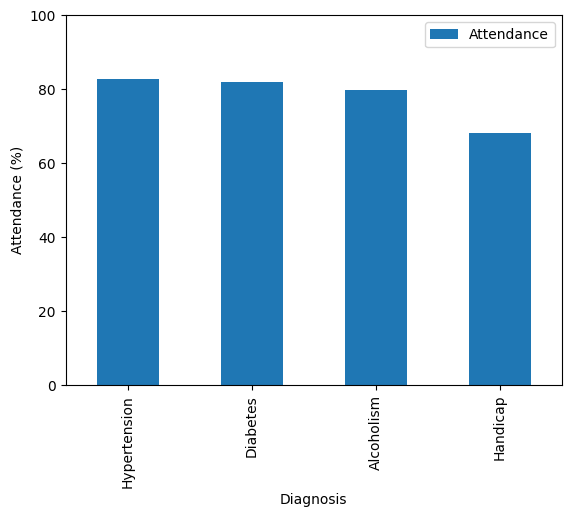

In [26]:
#show difference in attendance in bar chart
gr_att = dx_attendance[['Diagnosis', 'Attendance']]
gr_att.plot(x='Diagnosis', xlabel='Diagnosis', ylim = (0,100), ylabel='Attendance (%)', kind='bar');

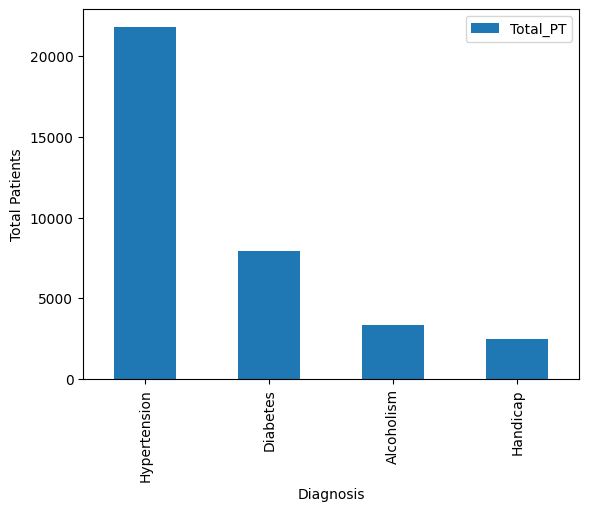

In [27]:
#show total patients for each diagnosis
gr_dx = dx_attendance[['Diagnosis', 'Total_PT']]
gr_dx.plot(x='Diagnosis', xlabel='Diagnosis', ylabel='Total Patients', kind='bar');

### Research Question 2 - Is there a difference in attendance based on gender?
#### Findings:

There is not much difference in percentage of attendance between the two genders. It is very slightly lower for women and not enough data is there to determine cause, such as lack of childcare, transportation, etc. There are more female patients than male patients that show up to the appointments. Further data is needed to determine if there truly is a difference in attendance in male vs female patients.

In [28]:
#create bar chart function for quick comparison
def myComparePlot(df, gVar, yVar='No-show', normalize=True, mul=100, color='purple', show_data=False):
    # prep data
    data = df.groupby(gVar)[yVar].value_counts(normalize=normalize).mul(mul).unstack()['No']
    # plot
    data.plot.bar(edgecolor='black', figsize=[14,4], rot=0, width=0.8, color=color);
    # cleanup
    gVar=gVar.replace("_"," ")
    #title and format
    plt.title(f'Effect of {gVar} on Patient Attendance'.title(), fontsize=14, weight='bold')
    # x label and format
    plt.xlabel(gVar.title(), fontsize=10, weight='bold')
    # y label and format
    plt.ylabel(f'{"Percentage" if normalize else "Frequency"}'.title(), fontsize=10, weight='bold')
    if show_data:
        display(data)

Gender
F    79.685129
M    80.032052
Name: No, dtype: float64

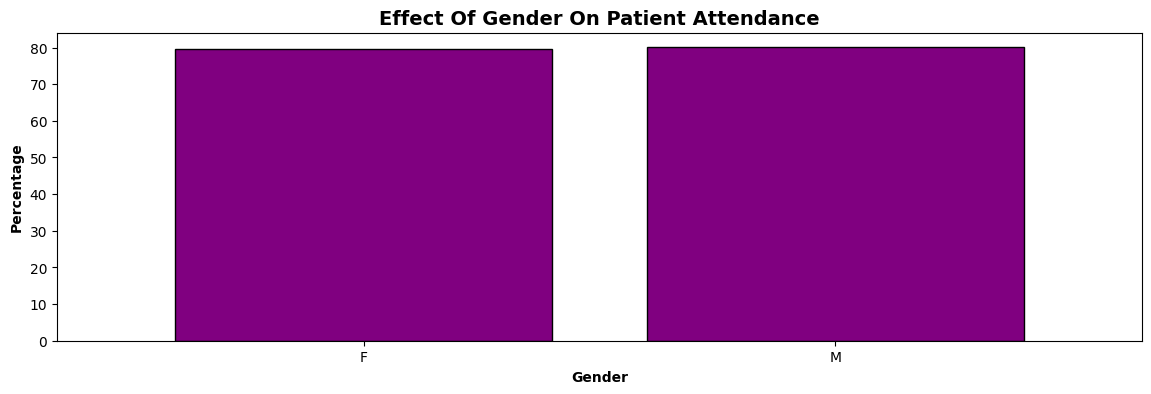

In [29]:
#create bar chart to show percentage of attendance
myComparePlot(df,'Gender', show_data=True)

Gender
F    57245
M    30962
Name: No, dtype: int64

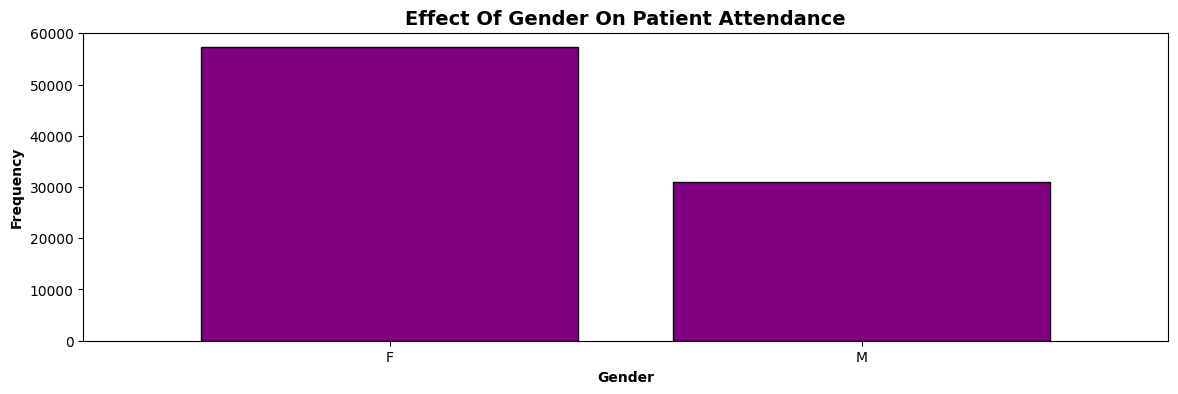

In [30]:
# compare attendance frequency between gender
myComparePlot(df,'Gender', normalize=False, mul=1,show_data=True)

### Research Question 3 - Did patients that received a sms message reminder have a higher attendance than those that did not?
#### Findings:

According to the data available, it seems as though receiving an SMS message did not have an effect on increasing attendance. The data is missing information how many patients have access to a mobile phone to receive the messages which could skew the results if only a small percentage of patients had access to a mobile phone.

SMS_received
No     83.296466
Yes    72.425455
Name: No, dtype: float64

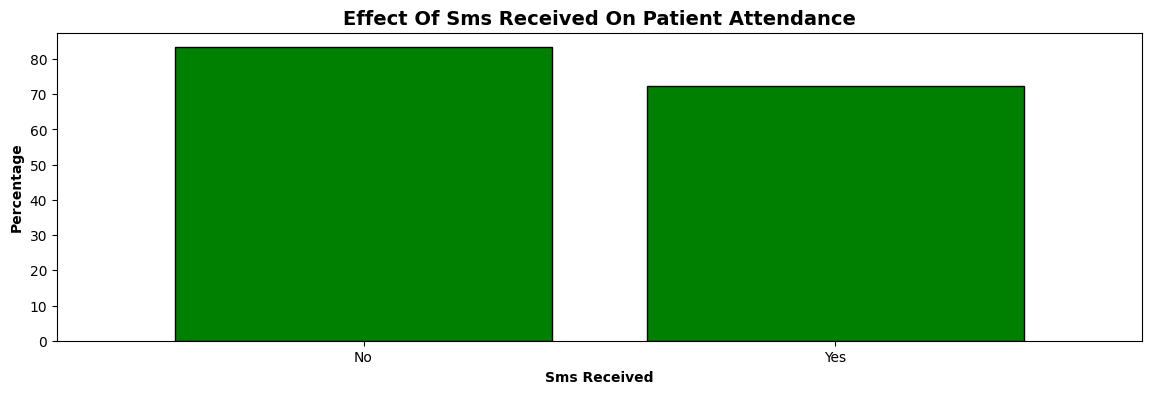

In [31]:
#create bar graph with function on effect of SMS on attendance
myComparePlot(df, 'SMS_received', show_data=True, color='green')

SMS_received
No     62509
Yes    25698
Name: No, dtype: int64

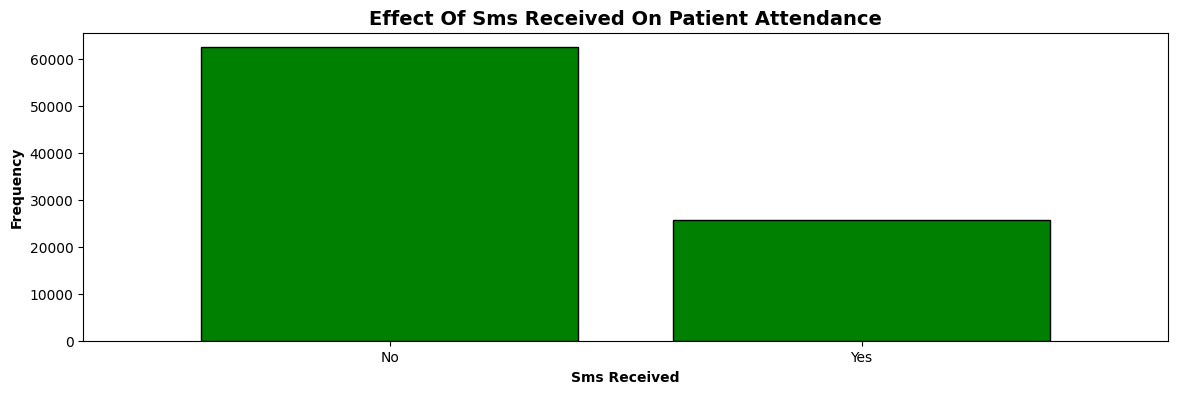

In [32]:
# compare attendance frequency between gender
myComparePlot(df,'SMS_received', normalize=False, mul=1,show_data=True, color='Green')

### Research Question 4 - Was there a major difference in attendance between welfare and non-welfare patients?
#### Findings:

in prog

Welfare
No     80.192645
Yes    76.263696
Name: No, dtype: float64

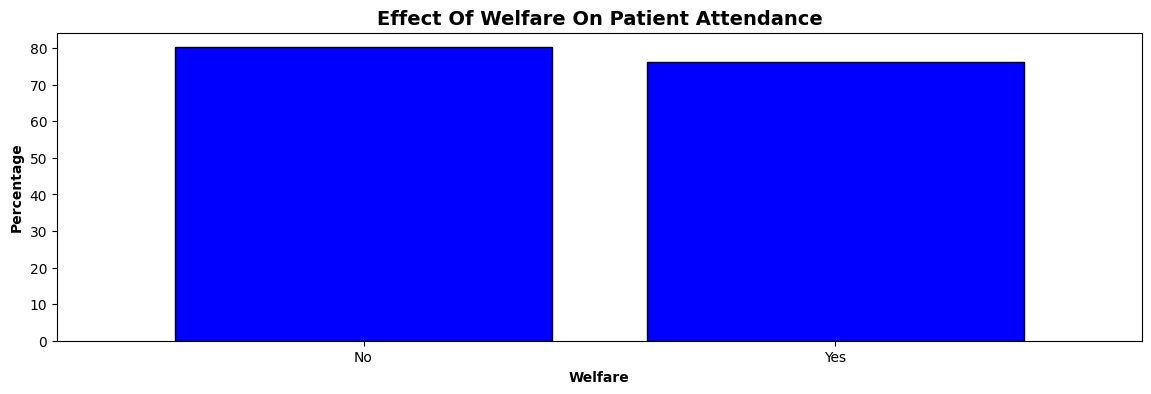

In [33]:
# compare attendance frequency between those that have and don't have welfare
myComparePlot(df,'Welfare',show_data=True, color='Blue')

Welfare
No     79924
Yes     8283
Name: No, dtype: int64

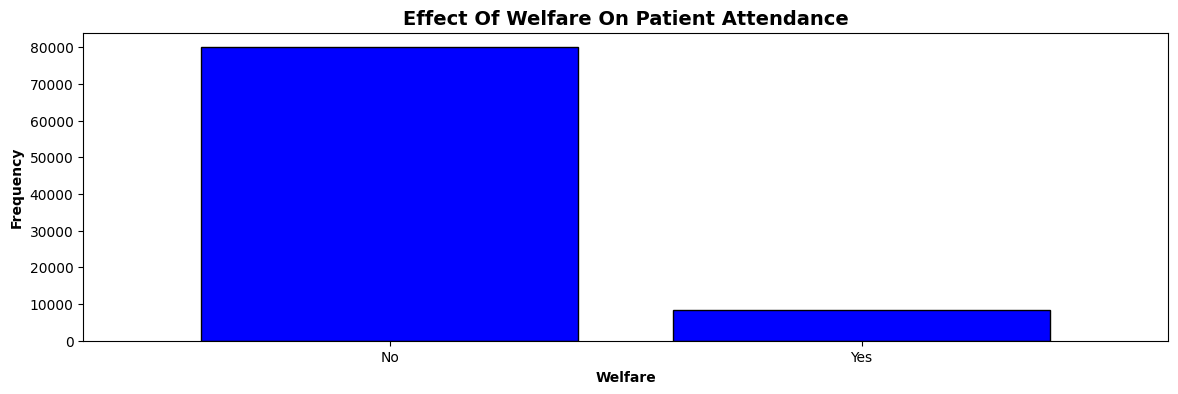

In [34]:
# compare attendance frequency between gender
myComparePlot(df,'Welfare', normalize=False, mul=1,show_data=True, color='Blue')

### Research Question 5 - How did attendance differ between age groups?
#### Findings:

in progress

In [35]:
#create data
info_age = {'Age' : df['Age'],
           'Attendance' : df['No-show']}
info_age = pd.DataFrame(info_age)
info_age

,Age,Attendance
0,62,No
1,56,No
2,62,No
3,8,No
4,56,No
...,...,...
110522,56,No
110523,51,No
110524,21,No
110525,38,No


In [36]:
#define age groups
bins = [0, 18, 30, 45, 60, 75, 100, 120]
labels = ['0-17', '18-29', '30-44', '45-59', '60-74', '75-99', '100+']

#add age_group column
info_age['Age_group'] = pd.cut(info_age['Age'], bins = bins, labels = labels, right = False)

info_age

,Age,Attendance,Age_group
0,62,No,60-74
1,56,No,45-59
2,62,No,60-74
3,8,No,0-17
4,56,No,45-59
...,...,...,...
110522,56,No,45-59
110523,51,No,45-59
110524,21,No,18-29
110525,38,No,30-44


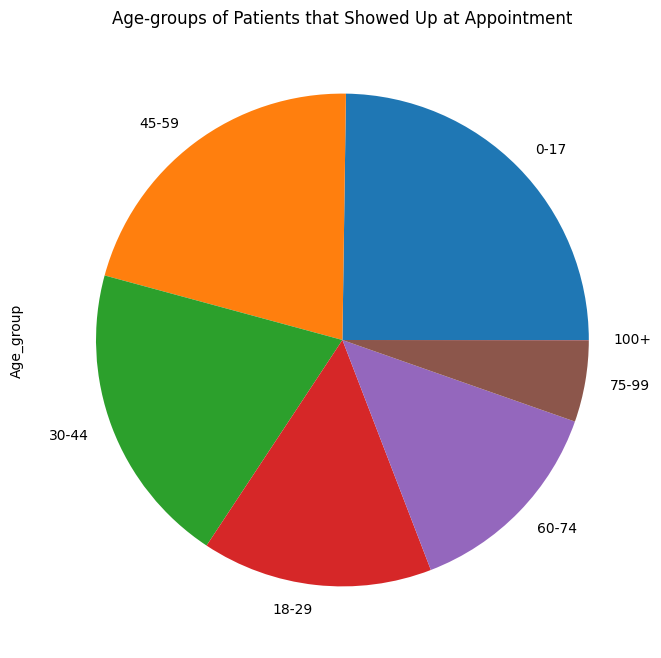

In [37]:
#create pie chart showing the age-groups of those that attended
info_age['Age_group'].value_counts().plot(title='Age-groups of Patients that Showed Up at Appointment',kind = 'pie', figsize = (8,8));

In [38]:
#find attendance per age group
age_att = info_age.groupby(['Age_group','Attendance'], as_index=False)['Age'].count()
age_att = pd.DataFrame(age_att)
age_att

,Age_group,Attendance,Age
0,0-17,No,21382
1,0-17,Yes,5997
2,18-29,No,12607
3,18-29,Yes,4124
4,30-44,No,17216
5,30-44,Yes,4806
6,45-59,No,19071
7,45-59,Yes,4150
8,60-74,No,12946
9,60-74,Yes,2291


In [39]:
age_att2 = {'Group' : age_att['Age_group'].unique(),
           'Showed' : [age_att.at[0,'Age'], age_att.at[2,'Age'], age_att.at[4,'Age'], age_att.at[6,'Age'], age_att.at[8,'Age'], age_att.at[10,'Age'], age_att.at[12,'Age']],
           'No-Showed' : [age_att.at[1,'Age'], age_att.at[3,'Age'], age_att.at[5,'Age'], age_att.at[7,'Age'], age_att.at[9,'Age'], age_att.at[11,'Age'], age_att.at[13,'Age']]}
age_att2 = pd.DataFrame(age_att2)
age_att2['Total'] = age_att2['Showed'] + age_att2['No-Showed']
age_att2['Attendance'] = (age_att2['Showed']/age_att2['Total'])*100
age_att2['Attendance'] = age_att2['Attendance'].map('{:.2f}'.format).astype(float)
age_att2

,Group,Showed,No-Showed,Total,Attendance
0,0-17,21382,5997,27379,78.10
1,18-29,12607,4124,16731,75.35
2,30-44,17216,4806,22022,78.18
3,45-59,19071,4150,23221,82.13
4,60-74,12946,2291,15237,84.96
5,75-99,4977,948,5925,84.00
6,100+,8,3,11,72.73


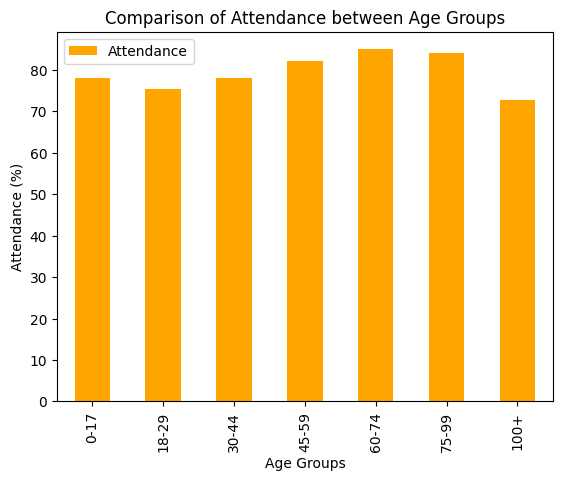

In [40]:
#create bar graph
age_att2.plot(x='Group', 
            y='Attendance', 
            xlabel = 'Age Groups', 
            ylabel = 'Attendance (%)', 
            kind='bar', color = 'orange',
            title='Comparison of Attendance between Age Groups');

<a id='conclusions'></a>
## Conclusions

This analysis explored the factors that may influence patient attendance at scheduled medical appointments. Notably, patients diagnosed with Hypertension and Diabetes had the highest attendance percentages, while those with Alcoholism and Disabilities (Handicap) showed the lowest. These trends suggest a potential gap in accessibility and support for patients with certain health challenges. Further research could explore transportation barriers or physical accessibility, especially for patients with disabilities or substance use disorders, to determine whether solutions like transportation services might improve attendance.

The gender analysis revealed no major differences in attendance percentages. However, it is important to note the significant gender imbalance in the dataset, with nearly twice as many female patients as male. This opens the door for additional research into why fewer male patients seek or attend care, potentially linked to work conflicts, cultural norms, or healthcare engagement disparities.

Interestingly, receiving an SMS reminder was not associated with higher attendance—in fact, those who received a reminder had a slightly lower attendance rate. This suggests that SMS may not be an effective outreach method for all patients. Future research could explore factors like mobile phone access, message delivery issues, or whether alternative communication channels (e.g., phone calls, emails, or app notifications) could produce better results.

With respect to welfare enrollment, attendance rates were fairly similar between groups. However, a striking finding was that only about 10% of patients were on welfare, prompting questions about eligibility awareness or systemic barriers to enrollment. Investigating whether more patients qualify but are unaware or face difficulty applying could inform public health outreach efforts.

Finally, analysis by age group showed relatively consistent attendance overall, though seniors (65+) had the highest attendance, while young adults (18–29) had the lowest. This may reflect generational differences in priorities, work constraints, or access to benefits. Further study could examine whether factors like work schedules, lack of childcare, or limited insurance coverage contribute to low attendance in younger patients.

In summary, while the dataset offers useful insights into attendance behavior, several opportunities for deeper investigation exist—especially around barriers to care, outreach effectiveness, and disparities by diagnosis, age, and socioeconomic status. Additional qualitative data or expanded datasets could help uncover the "why" behind these patterns and lead to actionable solutions for improving patient engagement.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [41]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 683154 bytes to Investigate_a_Dataset.html
